In [124]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute
from qiskit.circuit.library import IntegerComparator
from qiskit import Aer

In [684]:
backend = Aer.get_backend('aer_simulator')

In [685]:
a =10
binary = format(a,'b')
integer_list = [int(char) for char in binary]

circuit = QuantumCircuit(len(integer_list)*2,1)
print(len(integer_list))

count = 0 
for i in range(len(integer_list)):
    if integer_list[i] == 1:
        circuit.x(i)
        count+=1

    comparator = IntegerComparator(num_state_qubits = count, value = a, geq = True)
#num_state_qubits: number of qubits that will hold the integer
#value: integer that we want to compare
#geq: Boolean Flag (i >= value)

4


In [686]:

circuit = circuit.compose(comparator)

circuit.measure(count,0)

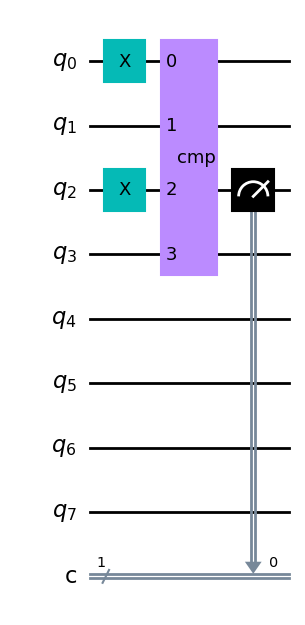

In [687]:
circuit.draw()

In [688]:
n = 6
job = execute(circuit, backend, shots=n)
counts = job.result().get_counts()
print(counts)



{'1': 6}
